### Download the data

In [1]:
import sys
sys.path.insert(0, '../src')

from NN2 import *
from tensorflow.keras import datasets # High order layers, models, etc
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fashion_mnist = datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
train_images.shape, test_images.shape, type(train_images), train_labels.shape

((60000, 28, 28), (10000, 28, 28), numpy.ndarray, (60000,))

#### visualise the data

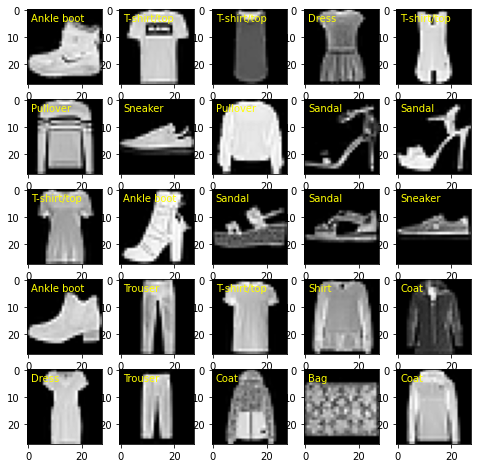

In [4]:
fig, axs = plt.subplots(5,5,figsize=(8,8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(train_images[i,:,:],cmap='gray', vmin=0, vmax=255)
    ax.text(1,1,class_names[train_labels[i]],color='yellow',va='top', ha='left')

### Run the NN to see if it works

First transform the data for NN. 
* Flatten images and divide greyscale by 255.
* One-hot encode y data (I'm doing this with numpy rather than an imported library, so its a couple more lines of code).

In [5]:
train_N = train_labels.size
test_N = test_labels.size
X_train = train_images.reshape(-1, 28*28) / 255
X_test = test_images.reshape(-1, 28*28) / 255
y_train = np.zeros((train_N, 10))
y_train[np.arange(train_N), train_labels] = 1
y_test = np.zeros((test_N, 10))
y_test[np.arange(test_N), test_labels] = 1

In [13]:
model = NN(learning_rate=0.25, regularization=None, reg_alpha=None, random_seed=1)

model.add(nodes = 512, activation=NN.ReLu)
model.add(nodes = 10, activation = NN.softmax)

model.model(X_train, y_train, X_test, y_test, minibatch_size=64, scale="He", verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 512
weight shape: (784, 512)
bias shape: (1, 512)
activation function is <function NN.ReLu at 0x131ea33a0>

hidden layer 1:
nodes in previous layer: 512
nodes in this layer: 10
weight shape: (512, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x131ea34c0>


In [15]:
%%time
model.fit(epochs=15, min_epochs=5, patience=2, stopping_metric="valid", verbose=True)

epoch 0 average loss: 0.236; train accy: 0.906; test accy: 0.876; test loss: 0.359
epoch 1 average loss: 0.228; train accy: 0.911; test accy: 0.872; test loss: 0.361
epoch 2 average loss: 0.220; train accy: 0.914; test accy: 0.875; test loss: 0.350
epoch 3 average loss: 0.215; train accy: 0.876; test accy: 0.837; test loss: 0.449
epoch 4 average loss: 0.208; train accy: 0.927; test accy: 0.885; test loss: 0.340
epoch 5 average loss: 0.201; train accy: 0.923; test accy: 0.879; test loss: 0.347
epoch 6 average loss: 0.195; train accy: 0.921; test accy: 0.877; test loss: 0.359
average loss improvement is small: early stop
CPU times: user 4min 16s, sys: 46.8 s, total: 5min 3s
Wall time: 51.3 s


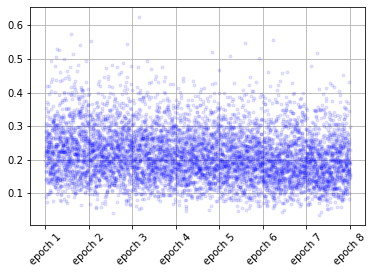

In [16]:
model.plot_error()

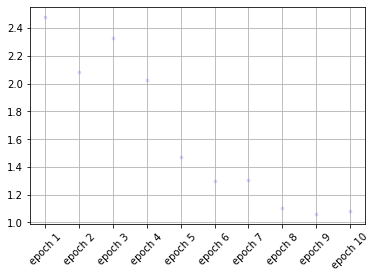

In [12]:
model.plot_error()

In [15]:
model plot_errorlearning_rate=0.25, regularization="L2", reg_alpha=0.01)
model.add(1024, NN.ReLu)
# model.add(256, NN.ReLu)
# model.add(32, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=None, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is L2 with parameter 0.01

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x130702af0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x130702c10>


In [10]:
%%time
model.fit(epochs=15, min_epochs=2, patience=5, stopping_metric="valid", verbose=True)

epoch 0 average loss: 0.654; train accy: 0.808; test accy: 0.793; test loss: 0.571
epoch 1 average loss: 0.604; train accy: 0.755; test accy: 0.746; test loss: 0.697
epoch 2 average loss: 0.603; train accy: 0.773; test accy: 0.764; test loss: 0.647
epoch 3 average loss: 0.596; train accy: 0.803; test accy: 0.788; test loss: 0.577
epoch 4 average loss: 0.597; train accy: 0.794; test accy: 0.783; test loss: 0.591
epoch 5 average loss: 0.590; train accy: 0.808; test accy: 0.796; test loss: 0.581
average loss improvement is small: early stop
CPU times: user 9min 25s, sys: 1min 21s, total: 10min 47s
Wall time: 1min 25s


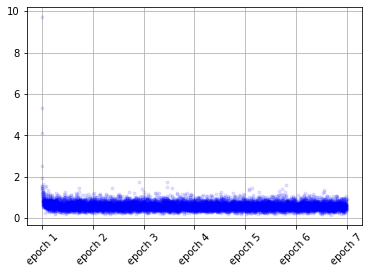

In [11]:
model.plot_error()

In [12]:
model = NN(learning_rate=0.25, regularization=None, reg_alpha=None)
model.add(1024, NN.ReLu)
# model.add(256, NN.ReLu)
# model.add(32, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x130702af0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x130702c10>


In [13]:
model.fit(epochs=15)

epoch 0 average loss: 0.540; train accy: 0.858; test accy: 0.846; test loss: 0.440
epoch 1 average loss: 0.382; train accy: 0.867; test accy: 0.851; test loss: 0.416
epoch 2 average loss: 0.343; train accy: 0.887; test accy: 0.868; test loss: 0.372
epoch 3 average loss: 0.318; train accy: 0.887; test accy: 0.862; test loss: 0.373
epoch 4 average loss: 0.298; train accy: 0.874; test accy: 0.854; test loss: 0.441
average loss improvement is small: early stop


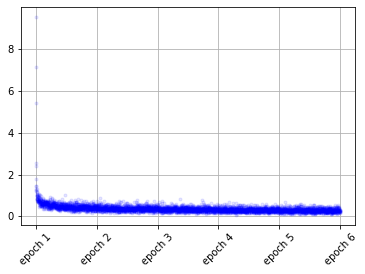

In [14]:
model.plot_error()

In [16]:
model = NN(learning_rate=0.25, regularization="L1", reg_alpha=0.01)
model.add(1024, NN.ReLu)
# model.add(256, NN.ReLu)
# model.add(32, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.25
regularization is L1 with parameter 0.01
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x1339d34c0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x1339d35e0>


In [17]:
model.fit(epochs=5)

epoch 0 loss: 1.291; train accy: 0.436; test accy: 0.440
epoch 1 loss: 1.600; train accy: 0.336; test accy: 0.336
epoch 2 loss: 1.539; train accy: 0.470; test accy: 0.471
epoch 3 loss: 2.377; train accy: 0.304; test accy: 0.305


KeyboardInterrupt: 

In [18]:
model = NN(learning_rate=0.1)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)

number of samples = 60000
training data has 784 features
learning rate = 0.1
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x1339d34c0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x1339d35e0>


In [19]:
model.fit(epochs=15)

epoch 0 loss: 0.500; train accy: 0.850; test accy: 0.836
epoch 1 loss: 0.236; train accy: 0.860; test accy: 0.844
epoch 2 loss: 0.313; train accy: 0.880; test accy: 0.863
epoch 3 loss: 0.427; train accy: 0.888; test accy: 0.867
epoch 4 loss: 0.334; train accy: 0.881; test accy: 0.858
epoch 5 loss: 0.388; train accy: 0.893; test accy: 0.870
epoch 6 loss: 0.546; train accy: 0.896; test accy: 0.872
epoch 7 loss: 0.195; train accy: 0.907; test accy: 0.880
epoch 8 loss: 0.260; train accy: 0.909; test accy: 0.879
epoch 9 loss: 0.221; train accy: 0.915; test accy: 0.883
epoch 10 loss: 0.152; train accy: 0.918; test accy: 0.883
epoch 11 loss: 0.223; train accy: 0.921; test accy: 0.883
epoch 12 loss: 0.203; train accy: 0.916; test accy: 0.877
epoch 13 loss: 0.143; train accy: 0.919; test accy: 0.884
epoch 14 loss: 0.164; train accy: 0.915; test accy: 0.878


In [21]:
model = NN(learning_rate=0.5)
model.add(1024, NN.ReLu)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, minibatch_size=64, verbose=True)
print("\n\n")
model.fit(epochs=15)

number of samples = 60000
training data has 784 features
learning rate = 0.5
regularization is None with parameter None
minibatch size is 64

hidden layer 0:
nodes in previous layer: 784
nodes in this layer: 1024
weight shape: (784, 1024)
bias shape: (1, 1024)
activation function is <function NN.ReLu at 0x1339d34c0>

hidden layer 1:
nodes in previous layer: 1024
nodes in this layer: 10
weight shape: (1024, 10)
bias shape: (1, 10)
activation function is <function NN.softmax at 0x1339d35e0>
epoch 0 loss: 0.546; train accy: 0.847; test accy: 0.832
epoch 1 loss: 0.184; train accy: 0.847; test accy: 0.831
epoch 2 loss: 0.276; train accy: 0.861; test accy: 0.843
epoch 3 loss: 0.457; train accy: 0.877; test accy: 0.854
epoch 4 loss: 0.379; train accy: 0.842; test accy: 0.820
epoch 5 loss: 0.369; train accy: 0.883; test accy: 0.854
epoch 6 loss: 0.627; train accy: 0.883; test accy: 0.858
epoch 7 loss: 0.309; train accy: 0.877; test accy: 0.847
epoch 8 loss: 0.338; train accy: 0.890; test accy:

Try a Sigmoid activation function

In [ ]:
model = NN(learning_rate=0.25)
model.add(356, NN.sigmoid)
model.add(10, NN.softmax)
model.model(X_train, y_train, X_test, y_test, verbose=True)

In [ ]:
model.fit(epochs=10)